In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cmocean

# Plot SST Anomalies
Cut out North Atlantic from data

In [2]:
sst_obs = xr.load_dataset("sst_data/sst.day.mean.2023.na.nc")
mean_1982 = xr.load_dataset("sst_data/sst.day.mean.ltm.1982-2010.nc")
mean_1991 = xr.load_dataset("sst_data/sst.day.mean.ltm.1991-2020.nc")
mean_1982.coords['lon'] = (mean_1982.coords['lon'] + 180) % 360 - 180
mean_1982 = mean_1982.sortby(mean_1982.lon)
mean_1991.coords['lon'] = (mean_1991.coords['lon'] + 180) % 360 - 180
mean_1991 = mean_1991.sortby(mean_1991.lon)

mean_1982 = mean_1982[["sst"]].sel(lat=slice(-10,80), lon=slice(-120,60))
mean_1991 = mean_1991[["sst"]].sel(lat=slice(-10,80), lon=slice(-120,60))

mean_1982.to_netcdf(path="sst_data/sst.day.mean.ltm.1982-2010.na.nc")
mean_1991.to_netcdf(path="sst_data/sst.day.mean.ltm.1991-2020.na.nc")

/srv/data/miniconda/envs/na_heatwave/lib/python3.12/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/data/miniconda/envs/na_heatwave/lib/python3.12/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/srv/data/miniconda/envs/na_heatwave/lib/python3.12/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/data/miniconda/envs/na_heatwave/lib/pytho

In [2]:
sst_obs = xr.load_dataset("sst_data/sst.day.mean.2023.na.nc")
mean_1982 = xr.load_dataset("sst_data/sst.day.mean.ltm.1982-2010.na.nc")
mean_1991 = xr.load_dataset("sst_data/sst.day.mean.ltm.1991-2020.na.nc")

/srv/data/miniconda/envs/na_heatwave/lib/python3.12/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/data/miniconda/envs/na_heatwave/lib/python3.12/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)
/srv/data/miniconda/envs/na_heatwave/lib/python3.12/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/data/miniconda/env

In [5]:
sst_mm = sst_obs.sst.groupby("time.month").mean(dim="time")
mm_1982 = mean_1982.sst.groupby("time.month").mean(dim="time")
mm_1991 = mean_1991.sst.groupby("time.month").mean(dim="time")
anom_1982 = sst_mm - mm_1982
anom_1991 = sst_mm - mm_1991

<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2372168/1964444501.py:25: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)', fontsize=10)


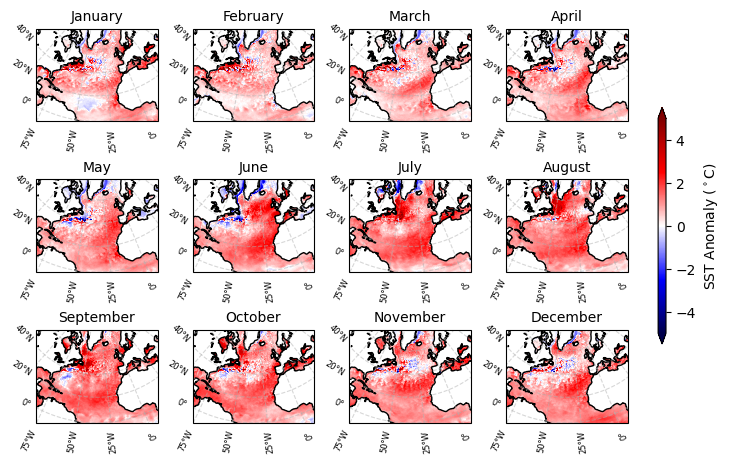

In [7]:
central_lon = -35
central_lat = 35
coloring = plt.get_cmap("seismic")
months = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}

fig1, axs1 = plt.subplots(3, 4, figsize=(7.2, 5), layout = 'compressed', subplot_kw={"projection":ccrs.LambertConformal(central_lon, central_lat)})
axs1 = axs1.flatten()

for i,month in enumerate(range(1,13)):
    anom_month = anom_1982.sel(month=month)
    anom_month["month"] = months[i+1]
    axs1[i].coastlines()
    axs1[i].add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
    axs1[i].set_extent([-80, 10, 0, 70])
    gl = axs1[i].gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
    gl.right_labels = False
    gl.top_labels = False
    gl.xlabel_style = {"size":6}
    gl.ylabel_style = {"size":6}
    anom_plt = anom_month.plot(ax=axs1[i], cmap=coloring, transform=ccrs.PlateCarree(), vmin=-5, vmax=5, add_colorbar=False)
    axs1[i].set_title(anom_month["month"].values, fontsize=10)
    axs1[i]

cbar = plt.colorbar(anom_plt, ax=axs1, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)', fontsize=10) 

fig1.savefig("figures/1982_ltm_anomalies.png", dpi=300)


<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2372168/3329928181.py:20: SyntaxWarning: invalid escape sequence '\c'
  cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)', fontsize=10)


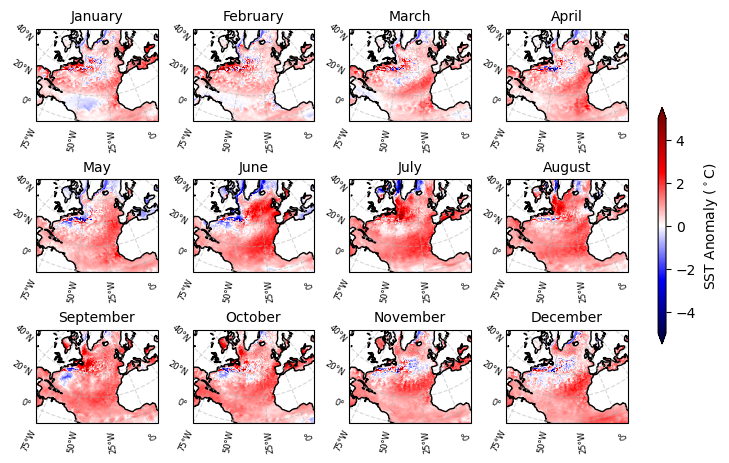

In [8]:
fig2, axs2 = plt.subplots(3, 4, figsize=(7.2, 5), layout = 'compressed', subplot_kw={"projection":ccrs.LambertConformal(central_lon, central_lat)})
axs2 = axs2.flatten()

for i,month in enumerate(range(1,13)):
    anom_month = anom_1991.sel(month=month)
    anom_month["month"] = months[i+1]
    axs2[i].coastlines()
    axs2[i].add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
    axs2[i].set_extent([-80, 10, 0, 70])
    gl = axs2[i].gridlines(alpha = 0.5, draw_labels=True, linestyle = "--", x_inline=False, y_inline=False)
    gl.right_labels = False
    gl.top_labels = False
    gl.xlabel_style = {"size":6}
    gl.ylabel_style = {"size":6}
    anom_plt = anom_month.plot(ax=axs2[i], cmap=coloring, transform=ccrs.PlateCarree(), vmin=-5, vmax=5, add_colorbar=False)
    axs2[i].set_title(anom_month["month"].values, fontsize=10)
    axs2[i]

cbar = plt.colorbar(anom_plt, ax=axs2, orientation="vertical", extend="both", aspect=30, shrink=0.6)
cbar.ax.set_ylabel('SST Anomaly ($^\circ$C)', fontsize=10) 

fig1.savefig("figures/1991_ltm_anomalies.png", dpi=300)